## Configuration

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

## Data

In [294]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

X = train.drop('Transported', axis=1)
y = train[['Transported']]

X.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [312]:
X.dtypes

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Name                object
PassengerGroup      object
PassengerNumber     object
dtype: object

In [297]:
numeric_ = X.select_dtypes(exclude='object').copy()
categorical_ = X.select_dtypes(include='object').drop(['PassengerId', 'Cabin', 'Name'], axis=1).copy()

## Understanding

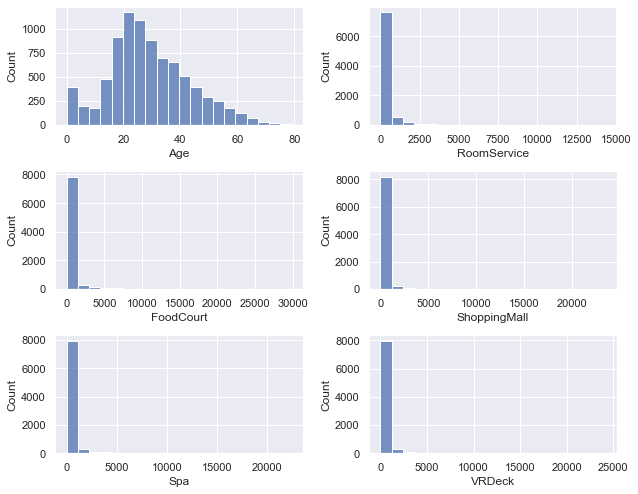

In [280]:
fig = plt.figure(figsize=(9,7))
for index, col in enumerate(numeric_.columns):
    plt.subplot(3,2,index+1)
    sns.histplot(numeric_.loc[:,col].dropna(), bins=20)
fig.tight_layout(pad=1.0)

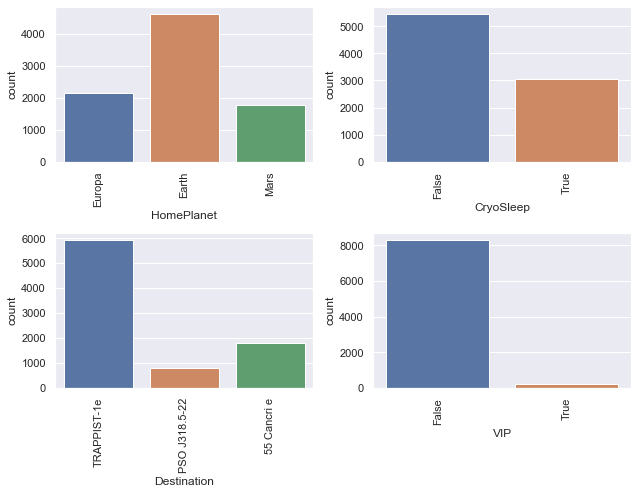

In [281]:
fig = plt.figure(figsize=(9,7))
for index, col in enumerate(categorical_.columns):
    plt.subplot(2,2,index+1)
    sns.countplot(x=categorical_.loc[:,col], data=categorical_.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

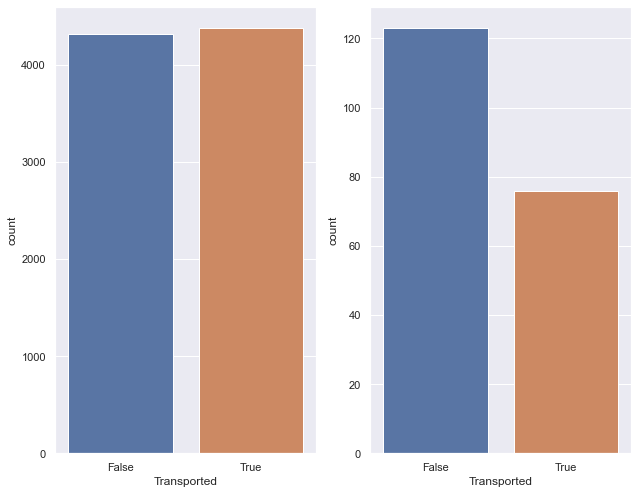

In [282]:
fig = plt.figure(figsize=(9,7))
plt.subplot(1,2,1)
sns.countplot(x='Transported', data=train)
plt.subplot(1,2,2)
sns.countplot(x='Transported', data=train.loc[train['VIP'] == True])
fig.tight_layout(pad=1.0)

In [313]:
def extract_id(passengerId):
    group = passengerId[0:4]
    number = passengerId[5:7]
    return group, number

extract_id_ = np.vectorize(extract_id)
group, number = extract_id_(X['PassengerId'])

X['PassengerGroup'] = group
X['PassengerNumber'] = number

In [311]:
def extract_cabin(cabin):
    deck = cabin[0:1]
    num = cabin[2:3]
    side = cabin[4:5]
    return deck, num, side

extract_cabin_ = np.vectorize(extract_cabin)
deck, num, side = extract_cabin_(X['Cabin'])

X['Deck'] = deck
X['Num'] = num
X['Side'] = side

TypeError: 'float' object is not subscriptable

## Data Processing

We can observe that every PassengerGroup starts from same HomePlanet therefore we can change 'nan' values to HomePlanet value for each PassengerGroup.

In [307]:
passGroup = X.groupby('PassengerGroup')['Destination']

for group, planet in passGroup:
    if len(pd.unique(planet.values)) > 1 and any(pd.isna(planet.values)):
        print(pd.unique(planet.values))

['TRAPPIST-1e' nan]
['TRAPPIST-1e' nan]
['55 Cancri e' nan 'TRAPPIST-1e']
['55 Cancri e' 'TRAPPIST-1e' nan]
['55 Cancri e' 'TRAPPIST-1e' nan]
[nan 'TRAPPIST-1e']
[nan '55 Cancri e']
['PSO J318.5-22' 'TRAPPIST-1e' nan '55 Cancri e']
[nan '55 Cancri e']
['TRAPPIST-1e' nan]
['55 Cancri e' 'TRAPPIST-1e' nan]
[nan 'TRAPPIST-1e']
['TRAPPIST-1e' nan]
['TRAPPIST-1e' nan]
[nan 'TRAPPIST-1e']
[nan 'PSO J318.5-22']
[nan '55 Cancri e']
['PSO J318.5-22' nan]
['55 Cancri e' 'TRAPPIST-1e' nan]
['PSO J318.5-22' nan]
['TRAPPIST-1e' nan]
['55 Cancri e' 'TRAPPIST-1e' nan]
[nan 'TRAPPIST-1e']
[nan 'TRAPPIST-1e']
[nan 'TRAPPIST-1e']
['TRAPPIST-1e' '55 Cancri e' nan]
[nan 'TRAPPIST-1e']
['TRAPPIST-1e' nan]
['TRAPPIST-1e' nan '55 Cancri e']
[nan 'PSO J318.5-22']
[nan '55 Cancri e']
[nan 'TRAPPIST-1e']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[nan '55 Cancri e']
['TRAPPIST-1e' nan '55 Cancri e']
['TRAPPIST-1e' '55 Cancri e' nan]
['TRAPPIST-1e' nan]
[nan 'TRAPPIST-1e']
['TRAPPIST-1e' nan]
['TRAPPIST-1